#### Task 5

**Load the code “Anomaly_detection_autoencoder.py” and the related data ECG5000.zip
as well as the arff2pandas-master.zip. Extract the packages in the same folder where the
anomaly detection python code is.
Run the code and verify that it is working. The running might take time.
Can you improve the already high classification and what you have to change?**

LSTM autoencoder is constructed from two parts, encoder and decoder. Both of these are build using two similar LSTM layers and decoder has additional linear layer after them. Generally its, purpose is to capture long term depencies.

Encoder compresses and reads the input sequence data step by step and encodes the temporal depencies into hidden states.

Decoder reconstructs the sequence from the compressed hidden state and tries to generate similar output, which matches the original input.

Improvement attemp is made using bidirectional = True parameter for the first LSTM layer for both Encoder and Decoder. The second LSTM layer input size needs to be multiplied by two. Bidirectional doubles the hidden state dimension since it makes the model capture depencies in forward and backward directions. Run time for single epoch increased from 22s -> 28s. Around 70 epochs were run before stopping due to bad results. Loss stabled around 17, which indicated that it is not going any lower when comparing to original results (image below).

Additional run was made using linear layer (size of embedding dim) and activation function (ReLU) is added to Encoder after LSTM layers. This could improve results but after 40 epochs the loss stabled in around 40. Linear layer possibly lead to losing key features from the LSTMs.

**Verbally:**
- what is the best strategy to improve the code that is slow in the first place?

Best strategy would be to use algorithm optimization, which runs different setups parameters for model architecture and/or training process. Early stopping method is essential for time saving, where the run is stopped early when live time results are looking worse. These automation optimization may take more time for larger and slower models but they come in hand when finding the most optimal solution. It is more valuable to let machine work for few hours to find optimal solution than manually changing and monitoring training process. 

Deep examination on architecture and dataset may also save time. For example, there are no need for complex and time consuming models if dataset is small and task is simple. 

- In order to save time is there any way to monitor the improvements on the fly?

Simply, the monitor can be made by printing loss values and run times for each epoch (implemented on the anomally_detection_autoencoder.py). Huge and increasing loss can instantly indicate worse results and run can be stopped. Tqdm library is good for monitoring, whereas it can provide information about training times. Monitoring can be further automated and used to stop run early (as previously presented).

Code is run successfully. Outputs are below and model is working as expected when comparing to the tutorial at https://curiousily.com/posts/time-series-anomaly-detection-using-lstm-autoencoder-with-pytorch-in-python/

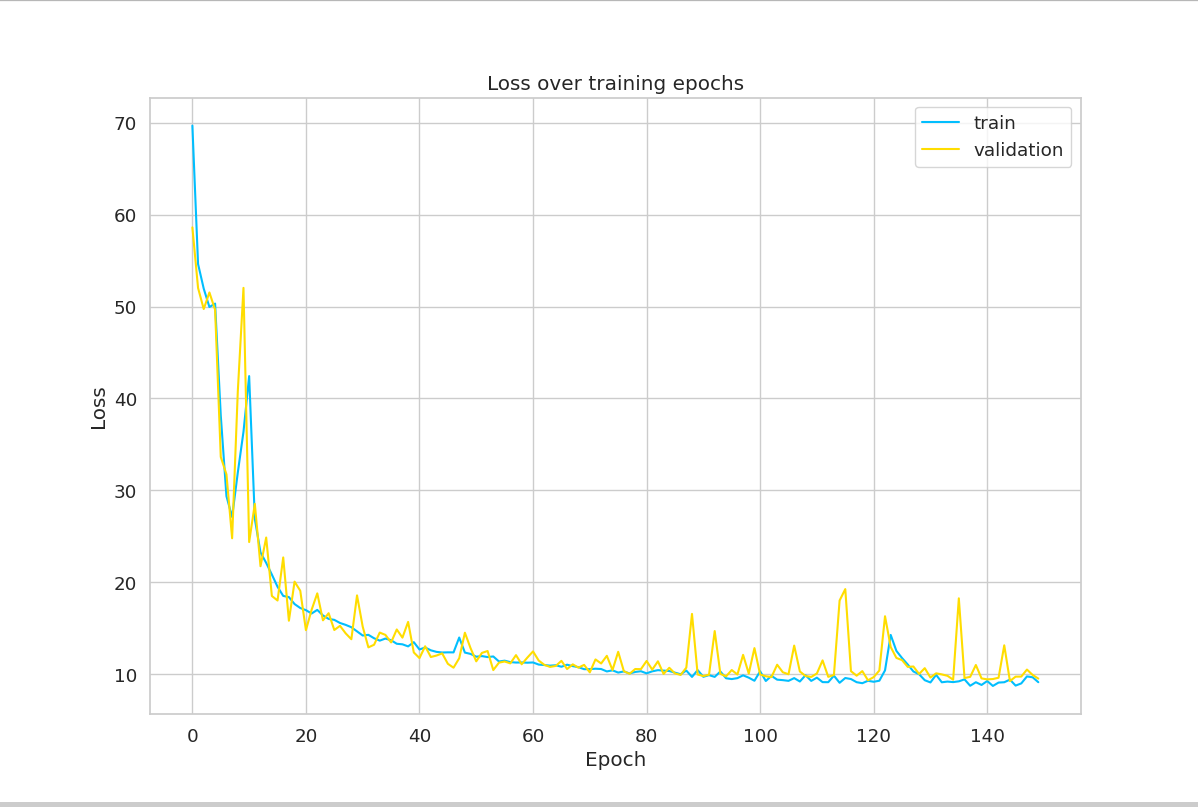

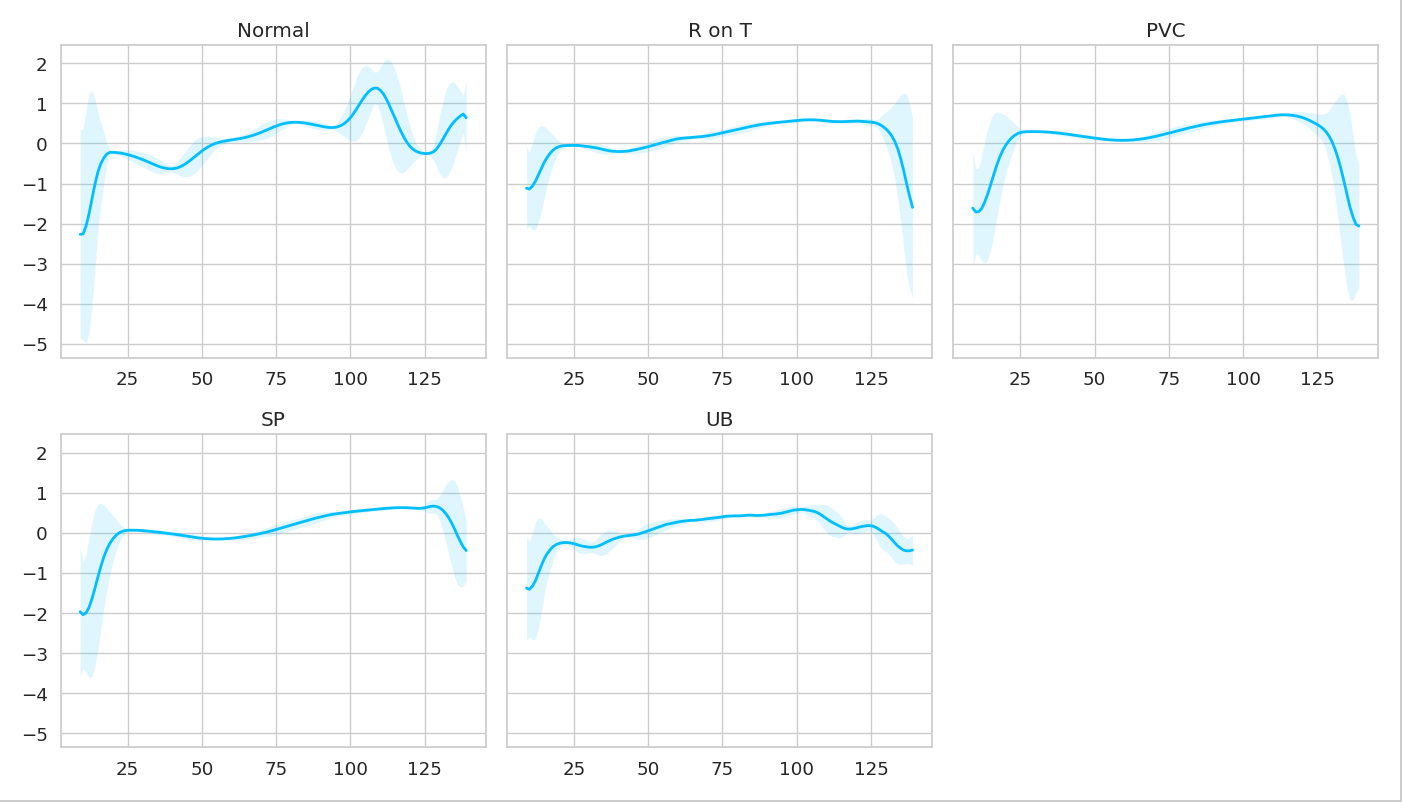

**Last epoch:**

Epoch 150: train loss 9.13842449030632 val loss 9.52928590286307

**Predictions:**

Correct normal predictions: 141/145
Correct anomaly predictions: 143/145